# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Ghifari Ahmad
- **Email:** ghifariahmadti1@gmail.com
- **ID Dicoding:** ghifari_ahmad_IPGH

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1

Apakah terdapat pola tertentu dalam perilaku peminjaman sepeda yang dapat diidentifikasi berdasarkan faktor cuaca dan musiman?
- Pertanyaan 2

Bagaimana faktor-faktor seperti hari libur, hari kerja, dan hari dalam seminggu memengaruhi jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [145]:
pip install streamlit

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spi

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

#### Download dataset Kaggle dan unzip file bike-sharing-dataset.zip



In [147]:
# Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
# Import OS for navigation and environment set up
import os

# Check current location, '/content' is the Colab virtual machine
os.getcwd()

# Enable the Kaggle environment, use the path to the directory your Kaggle API JSON is stored in
os.environ['KAGGLE_CONFIG_DIR'] = '/gdrive/MyDrive/Kaggle'

In [3]:
!pip install kaggle

In [4]:
# Navigate into Drive where you want to store your Kaggle data
os.chdir('/gdrive/MyDrive/Kaggle/')

# Paste and run the copied API command, the data will download to the current directory
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

# Check contents of directory, you should see the .zip file for the competition in your Drive
os.listdir()

bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


['day.csv',
 'hour.csv',
 'bike-sharing-dataset.zip',
 '.ipynb_checkpoints',
 'kaggle.json',
 'Readme.txt']

In [5]:
# Complete path to storage location of the .zip file of data
zip_path = '/gdrive/MyDrive/Kaggle/bike-sharing-dataset.zip'

# Check current directory (be sure you're in the directory where Colab operates: '/content')
os.getcwd()

# Copy the .zip file into the present directory
!cp '{zip_path}' .

# Unzip quietly
!unzip -q 'bike-sharing-dataset.zip'

# View the unzipped contents in the virtual machine
os.listdir()

cp: '/gdrive/MyDrive/Kaggle/bike-sharing-dataset.zip' and './bike-sharing-dataset.zip' are the same file
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


['day.csv',
 'hour.csv',
 'bike-sharing-dataset.zip',
 '.ipynb_checkpoints',
 'kaggle.json',
 'Readme.txt']

#### Load Tabel Day




In [8]:
# Load data day.csv ke dalam DataFrame pandas
day_df = pd.read_csv("/gdrive/MyDrive/Kaggle/day.csv")

# Tampilkan 5 baris pertama dari DataFrame
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load Tabel Hour

In [9]:
# Load data hour.csv ke dalam DataFrame pandas
hour_df = pd.read_csv("/gdrive/MyDrive/Kaggle/hour.csv")

# Tampilkan 5 baris pertama dari DataFrame
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data Day

In [10]:
# Memeriksa tipe data tiap kolom
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
# Memeriksa jumlah data duplikat
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
# Memeriksa parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data Hour

In [13]:
# Memeriksa tipe data tiap kolom
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
# Memeriksa jumlah data duplikat
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

# Memeriksa parameter statistik
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan Data Day

In [15]:
# Mengubah tipe data pada kolom "dteday" menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

# Memeriksa tipe data tiap kolom
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
# Mengganti nilai 0 dengan 2011 dan nilai 1 dengan 2012 pada kolom 'yr'
day_df['yr'] = day_df['yr'].replace({0: 2011, 1: 2012})

In [17]:
# Mengubah keterangan nilai untuk variabel 'season' dengan dictionary
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Mengganti nilai pada kolom 'season' menggunakan dictionary penggantian
day_df['season'] = day_df['season'].replace(season_mapping)

In [18]:
# Mengganti nilai 0 dengan 'No' dan nilai 1 dengan 'Yes' pada kolom 'holiday'
day_df['holiday'] = day_df['holiday'].replace({0: 'No', 1: 'Yes'})

In [19]:
# Mengubah keterangan nilai untuk variabel 'weekday' dengan dictionary
weekday_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Mengganti nilai pada kolom 'weekday' menggunakan dictionary penggantian
day_df['weekday'] = day_df['weekday'].replace(weekday_mapping)

In [20]:
# Mengganti nilai 0 dengan 'No' dan nilai 1 dengan 'Yes' pada kolom 'workingday'
day_df['workingday'] = day_df['workingday'].replace({0: 'No', 1: 'Yes'})

In [21]:
# Mengubah keterangan nilai untuk variabel 'weathersit' dengan dictionary
weathersit_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
}

# Mengganti nilai pada kolom 'weathersit' menggunakan dictionary penggantian
day_df['weathersit'] = day_df['weathersit'].replace(weathersit_mapping)

In [23]:
# Menampilkan dataFrame setelah cleaning data
day_df.info()

day_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,No,Sunday,No,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,1,No,Monday,No,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,1,No,Tuesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,1,No,Wednesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,1,No,Thursday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Membersihkan Data Hour

In [24]:
# Mengubah tipe data pada kolom "dteday" menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

# Memeriksa tipe data tiap kolom
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [25]:
# Mengganti nilai 0 dengan 2011 dan nilai 1 dengan 2012 pada kolom 'yr'
hour_df['yr'] = hour_df['yr'].replace({0: 2011, 1: 2012})

In [26]:
# Mengubah keterangan nilai untuk variabel 'season' dengan dictionary
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Mengganti nilai pada kolom 'season' menggunakan dictionary penggantian
hour_df['season'] = hour_df['season'].replace(season_mapping)

In [27]:
# Mengubah keterangan nilai untuk variabel 'hr' dengan dictionary
hr_mapping = {
    0: '00:00 - 04:00', 1: '00:00 - 04:00', 2: '00:00 - 04:00', 3: '00:00 - 04:00',
    4: '04:00 - 08:00', 5: '04:00 - 08:00', 6: '04:00 - 08:00', 7: '04:00 - 08:00',
    8: '08:00 - 12:00', 9: '08:00 - 12:00', 10: '08:00 - 12:00', 11: '08:00 - 12:00',
    12: '12:00 - 16:00', 13: '12:00 - 16:00', 14: '12:00 - 16:00', 15: '12:00 - 16:00',
    16: '16:00 - 20:00', 17: '16:00 - 20:00', 18: '16:00 - 20:00', 19: '16:00 - 20:00',
    20: '20:00 - 00:00', 21: '20:00 - 00:00', 22: '20:00 - 00:00', 23: '20:00 - 00:00'
}

# Mengganti nilai pada kolom 'season' menggunakan dictionary penggantian
hour_df['hr'] = hour_df['hr'].replace(hr_mapping)

In [28]:
# Mengubah keterangan nilai untuk variabel 'weekday' dengan dictionary
weekday_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Mengganti nilai pada kolom 'weekday' menggunakan dictionary penggantian
hour_df['weekday'] = hour_df['weekday'].replace(weekday_mapping)

In [29]:
# Mengganti nilai 0 dengan 'No' dan nilai 1 dengan 'Yes' pada kolom 'workingday'
hour_df['workingday'] = hour_df['workingday'].replace({0: 'No', 1: 'Yes'})

In [30]:
# Mengganti nilai 0 dengan 'No' dan nilai 1 dengan 'Yes' pada kolom 'holiday'
hour_df['holiday'] = hour_df['holiday'].replace({0: 'No', 1: 'Yes'})

In [31]:
# Mengubah keterangan nilai untuk variabel 'weathersit' dengan dictionary
weathersit_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
}

# Mengganti nilai pada kolom 'weathersit' menggunakan kamus penggantian
hour_df['weathersit'] = hour_df['weathersit'].replace(weathersit_mapping)

In [32]:
# Mengubah nilai kolom 'temp', 'atemp', 'hum', 'windspeed' menggunakan skala sebenarnya
max_temp = 41
max_atemp = 50
max_hum = 100
max_windspeed = 67

hour_df['temp'] = hour_df['temp'] * max_temp
hour_df['atemp'] = hour_df['atemp'] * max_atemp
hour_df['hum'] = hour_df['hum'] * max_hum
hour_df['windspeed'] = hour_df['windspeed'] * max_windspeed

In [33]:
# Menampilkan dataFrame setelah cleaning data
hour_df.info()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  object        
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,00:00 - 04:00,No,Sunday,No,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,00:00 - 04:00,No,Sunday,No,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,00:00 - 04:00,No,Sunday,No,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,00:00 - 04:00,No,Sunday,No,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,04:00 - 08:00,No,Sunday,No,Clear,9.84,14.395,75.0,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore Data Day

In [34]:
day_df.describe(include="all")

<ipython-input-34-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,NaN,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,NaN,No,Sunday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,NaN,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,6.519836,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,3.451913,NaN,NaN,NaN,NaN,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,1.000000,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,4.000000,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000


In [35]:
# Membuat pivot table yang memuat jumlah penyewa
# yang dikelompokkan berdasarkan 'season'
day_df.groupby(by=["season"]).agg({
    "instant": ["nunique"],
    "cnt": ["max","min", "mean", "std"]
})

instant   cnt                                
       nunique   max   min         mean          std
season                                              
Fall       188  8714  1115  5644.303191  1459.800381
Spring     181  7836   431  2604.132597  1399.942119
Summer     184  8362   795  4992.331522  1695.977235
Winter     178  8555    22  4728.162921  1699.615261

Berdasarkan pivot table di atas, dapat diketahui bahwa musim("season") didominasi oleh keterangan "Fall" atau musim gugur. Rata-rata peminjaman, jummlah peminjam maksimum dan jumlah peminjam minimum pada hari-hari dalam musim tersebut lebih besar nilainya dibandingkan hari-hari pada musim lainnya. Jumlah peminjam minimum pada musim dingin atau "winter" merupakan yang paling kecil dibandingkan musim-musim lainnya, tetapi standar deviasi pada musim tersebut merupakan yang terbesar diabndingkan musim-musim lainnya. Selain itu, rata-rata peminjaman pada musim semi atau "spring" merupakan yang terendah dibandingkan musim-musim lainnya.

In [36]:
# Membuat pivot table untuk melihat persebaran penyewa berdasarkan 'weathersit'
day_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
Clear         463
Mist          247
Light Rain     21
Name: instant, dtype: int64

In [37]:
# Membuat pivot table yang memuat jumlah penyewa
# yang dikelompokkan berdasarkan 'weathersit'
day_df.groupby(by=["weathersit"]).agg({
    "instant": ["nunique"],
    "cnt": ["max","min", "mean", "std"]
})

instant   cnt                               
           nunique   max  min         mean          std
weathersit                                             
Clear          463  8714  431  4876.786177  1879.483989
Light Rain      21  4639   22  1803.285714  1240.284449
Mist           247  8362  605  4035.862348  1809.109918

Berdasarkan dua buah pivot table di atas, dapat diketahui bahwa cuaca("weathersit") mayoritas per harinya ialah keterangan "Clear, Few Clouds, Partly Cloudy". Rata-rata dan maksimum peminjaman pada hari dengan cuaca tersebut juga yang paling tinggi dibanding hari-hari dengan cuaca lainnya. Di sisi lain, hari dengan keterangan cuaca "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" tidak memiliki satupun peminjam.

In [38]:
# Membuat pivot table yang memuat jumlah penyewa
# yang dikelompokkan berdasarkan 'weekday'
day_df.groupby(by=["weekday"]).agg({
    "cnt": ["max","min", "mean", "std"]
})

cnt                                
            max   min         mean          std
weekday                                        
Friday     7804   431  4667.259615  1939.433317
Monday     8227   605  4228.828571  1872.496629
Saturday   8362  1167  4690.288462  1874.624870
Sunday     8714   627  4550.542857  2196.693009
Thursday   8173   441  4548.538462  2038.095884
Tuesday    7525    22  4338.123810  1793.074013
Wednesday  7767   683  4510.663462  1826.911642

Berdasarkan pivot table di atas, dapat diketahui bahwa hari-hari dalam seminggu("weekday") memiliki rata-rata yang relatif sama untuk masing-masing hari. Sedangkan, jumlah peminjam maksimum terdapat pada hari minggu dan jumlah peminjam minimum terdapat pada hari selasa. Selain itu, standar deviasi terbesar terdapat pada hari minggu dan standar deviasi terkecil terdapat pada hari selasa.

In [39]:
# Membuat pivot table yang memuat jumlah penyewa
# yang dikelompokkan berdasarkan 'workingday'
day_df.groupby(by=["workingday"]).agg({
    "instant": ["nunique"],
    "cnt": ["max","min", "mean", "std"]
})

instant   cnt                               
           nunique   max  min         mean          std
workingday                                             
No             231  8714  605  4330.168831  2052.141245
Yes            500  8362   22  4584.820000  1878.415583

Berdasarkan pivot table di atas, dapat diketahui bahwa hari kerja("workingday") didominasi oleh keterangan "Yes", yaitu hari kerja. Rata-rata peminjaman pada hari kerja agak lebih besar dibandingkan dengan bukan hari kerja. Akan tetapi, jumlah peminjam maksimum pada bukan hari kerja agak lebih besar dibandingkan dengan hari kerja, sedangkan jumlah peminjam minimum pada bukan hari kerja jauh lebih besar nilainya dibandingkan dengan hari kerja.

In [40]:
# Membuat pivot table yang memuat jumlah penyewa
# yang dikelompokkan berdasarkan 'holiday'
day_df.groupby(by=["holiday"]).agg({
    "instant": "nunique",
    "cnt": ["max","min", "mean", "std"]
})

instant   cnt                                
        nunique   max   min         mean          std
holiday                                              
No          710  8714    22  4527.104225  1929.013947
Yes          21  7403  1000  3735.000000  2103.350660

Berdasarkan pivot table di atas, dapat diketahui bahwa hari libur("holiday") didominasi oleh keterangan "No", yang berarti bukan hari libur. Rata-rata peminjaman pada bukan hari libur lebih besar dibandingkan dengan hari libur. Jumlah peminjam maksimum pada bukan hari libur jauh lebih besar dibandingkan dengan hari libur. Akan tetapi, jumlah peminjam minimum pada hari libur jauh lebih besar nilainya dibandingkan dengan bukan hari libur.

### Explore Data Hour

In [41]:
hour_df.describe(include="all")

<ipython-input-41-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,NaN,6,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,NaN,16:00 - 20:00,No,Sunday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,NaN,2916,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,6.537775,NaN,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,3.438776,NaN,NaN,NaN,NaN,NaN,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,4.000000,NaN,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000


In [42]:
# Membuat pivot table yang memuat jumlah penyewa
# yang dikelompokkan berdasarkan 'season'
hour_df.groupby(by=["season"]).agg({
    "instant": ["nunique"],
    "cnt": ["max","min", "mean", "std"]
})

instant  cnt                            
       nunique  max min        mean         std
season                                         
Fall      4496  977   1  236.016237  197.711630
Spring    4242  801   1  111.114569  119.224010
Summer    4409  957   1  208.344069  188.362473
Winter    4232  967   1  198.868856  182.967972

Berdasarkan pivot table di atas, dapat diketahui bahwa musim("season") didominasi oleh keterangan "Fall" atau musim gugur. Rata-rata peminjaman dan jumlah peminjam maksimum pada rentang 4 jam dalam musim tersebut lebih besar nilainya dibandingkan hari-hari pada musim lainnya. Jumlah peminjam minimum pada tampak merata di setiap musim. Selain itu, jumlah peminjam maksimum dan rata-rata peminjaman pada musim semi atau "spring" merupakan yang terendah dibandingkan musim-musim lainnya.

In [43]:
# Membuat pivot table untuk melihat persebaran penyewa berdasarkan 'weathersit'
hour_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
Clear         11413
Mist           4544
Light Rain     1419
Heavy Rain        3
Name: instant, dtype: int64

In [44]:
# Membuat pivot table yang memuat jumlah penyewa
# yang dikelompokkan berdasarkan 'weathersit'
hour_df.groupby(by=[ "weathersit" ]).agg({
    "instant": ["nunique"],
    "cnt": ["max","min", "mean", "std"]
})

instant  cnt                            
           nunique  max min        mean         std
weathersit                                         
Clear        11413  977   1  204.869272  189.487773
Heavy Rain       3  164  23   74.333333   77.925178
Light Rain    1419  891   1  111.579281  133.781045
Mist          4544  957   1  175.165493  165.431589

Berdasarkan dua buah pivot table di atas, dapat diketahui bahwa cuaca("weathersit") mayoritas per rentang 4 jam ialah keterangan "Clear, Few Clouds, Partly Cloudy". Rata-rata dan maksimum peminjaman pada jam-jam dengan cuaca tersebut juga yang paling tinggi dibanding jam-jam dengan cuaca lainnya. Di sisi lain, jam-jam dengan keterangan cuaca "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" memiliki rata-rata dengan standar deviasi yang paling rendah karena sedikitnya jumlah peminjam. Akan tetapi, jumlah minimum peminjam pada jam-jam dengan cuaca tersebut ialah yang paling besar dibandingkan dengan musim lainnya.

In [45]:
# Membuat pivot table yang memuat jumlah penyewa
# yang dikelompokkan berdasarkan 'hour'
hour_df.groupby(by=["hr"]).agg({
    "cnt": ["max","min", "mean", "std"]
})

cnt                            
               max min        mean         std
hr                                            
00:00 - 04:00  283   1   30.684836   34.614629
04:00 - 08:00  596   1   79.550593  118.626828
08:00 - 12:00  839   5  240.033012  166.369335
12:00 - 16:00  776   3  249.788679  146.297625
16:00 - 20:00  977  11  377.629973  206.451689
20:00 - 00:00  584   2  154.377747  100.309183

Berdasarkan pivot table di atas, dapat diketahui bahwa jam("hr") didominasi oleh rentang pukul 16:00 hingga 20:00. Hal ini dikarenakan pada rentang jam tersebut memiliki rata-rata, jumlah nilai maksimum serta jumlah nilai minimum peminjam terbesar dibandingkan dengan rentang jam lainnya. Sedangkan, jumlah peminjam minimum dan rata-rata terendah terdapat pada rentang jam 00:00 hingga 04:00.

In [46]:
# Membuat pivot table yang memuat jumlah penyewa
# yang dikelompokkan berdasarkan 'weekday' dan 'hr'
hour_df.groupby(by=["weekday", "hr"]).agg({
    "cnt": ["max","min", "mean", "std"]
})

cnt                            
                         max min        mean         std
weekday   hr                                            
Friday    00:00 - 04:00   92   1   17.857143   17.794833
          04:00 - 08:00  571   1  111.616137  139.256928
          08:00 - 12:00  834  11  255.211165  179.493710
          12:00 - 16:00  460  12  192.497573   79.123898
          16:00 - 20:00  976  21  418.548077  221.314055
          20:00 - 00:00  514  11  177.697115  111.294809
Monday    00:00 - 04:00  188   2   66.070048   41.171965
          04:00 - 08:00   97   1   16.607843   16.161748
          08:00 - 12:00  591   5  203.590476  137.068521
          12:00 - 16:00  776   7  366.364286  160.705658
          16:00 - 20:00  723  11  293.069048  157.584913
          20:00 - 00:00  392   6  112.923810   77.153809
Saturday  00:00 - 04:00  114   1   24.207729   23.280484
          04:00 - 08:00  515   1   95.080685  116.346490
          08:00 - 12:00  785  21  266.778846  164.403175
          12:00 - 16:00  537  15  240.235577  106.032149
          16:00 - 20:00  957  45  386.615385  193.793969
          20:00 - 00:00  445  15  161.370192   88.111963
Sunday    00:00 - 04:00  249   2   58.866667   41.782210
          04:00 - 08:00  102   1   20.787081   21.557355
          08:00 - 12:00  663   8  223.400000  146.667767
          12:00 - 16:00  760  23  381.128571  187.273141
          16:00 - 20:00  783  15  308.334928  170.510400
          20:00 - 00:00  399  14  148.096154   82.889826
Thursday  00:00 - 04:00  283   1   15.819071   21.762567
          04:00 - 08:00  557   1  112.698529  142.532654
          08:00 - 12:00  839   8  252.737981  187.525448
          12:00 - 16:00  547  10  182.891827   91.788470
          16:00 - 20:00  977  13  409.330918  226.980259
          20:00 - 00:00  584   6  169.689320  118.144950
Tuesday   00:00 - 04:00  177   1   17.007407   20.204706
          04:00 - 08:00  530   1   91.700000  122.788785
          08:00 - 12:00  784  18  233.338942  160.836332
          12:00 - 16:00  566  25  202.048077   95.541312
          16:00 - 20:00  968  18  403.192308  209.926749
          20:00 - 00:00  475   2  149.444712  101.697884
Wednesday 00:00 - 04:00   69   1   12.977157   12.392725
          04:00 - 08:00  596   1  109.925743  138.106135
          08:00 - 12:00  835  11  245.943627  176.108003
          12:00 - 16:00  651   3  180.253012   87.494409
          16:00 - 20:00  970  36  425.617788  213.123157
          20:00 - 00:00  523  11  161.968750  103.412178

Berdasarkan pivot table di atas, dapat diketahui bahwa rentang jam yang dibandingkan dengan parameter hari dalam seminggu("weekday") memiliki didominasi oleh rentang jam 16:00 hingga 20:00 untuk setiap hari. Pada rentang jam tersebut, khusus hari Rabu, Kamis, dan Jumat memiliki rata-rata yang lebih tinggi dibandingkan dengan hari-hari lainnya. Rentang jam 00:00 hingga 04:00 di hari rabu merupakan rentang jam dengan jumlah peminjaman dan rata-rata paling kecil dibandingkan dengan rentang jam pada hari lainnya.

In [47]:
# Membuat pivot table yang memuat jumlah penyewa
# yang dikelompokkan berdasarkan 'workingday' dan 'hr'
hour_df.groupby(by=["workingday", "hr"]).agg({
    "instant": ["nunique"],
    "cnt": ["max","min", "mean", "std"]
})

instant  cnt                            
                         nunique  max min        mean         std
workingday hr                                                    
No         00:00 - 04:00     915  249   2   59.939891   41.716372
           04:00 - 08:00     909  387   1   19.938394   25.491005
           08:00 - 12:00     924  663   5  212.125541  141.354665
           12:00 - 16:00     924  776   7  365.612554  173.390869
           16:00 - 20:00     922  783  11  297.340564  165.200017
           20:00 - 00:00     920  584   2  129.697826   86.872576
Yes        00:00 - 04:00    1947  283   1   16.936312   18.778775
           04:00 - 08:00    1957  596   1  107.239653  133.760619
           08:00 - 12:00    1984  839   8  253.030242  175.338819
           12:00 - 16:00    1991  651   3  196.036163   90.976316
           16:00 - 20:00    1994  977  13  414.754764  212.996151
           20:00 - 00:00    1992  567   6  165.776104  104.002178

Berdasarkan pivot table di atas, dapat diketahui bahwa hari kerja("workingday") didominasi oleh keterangan "Yes", yaitu hari kerja. Rata-rata peminjaman pada rentang jam hari kerja relatif lebih besar dibandingkan dengan rentang jam bukan hari kerja. Rentang jam 16:00 hingga 20:00 pada hari kerja memiliki nilai rata-rata jumlah peminjam, jumlah peminjam maksimum dan jumlah peminjam minimum terbesar dibandingkan dengan rentang jam pada hari kerja ataupun bukan hari kerja. Sedangkan, rentang jam 00:00 hingga 04:00 pada hari kerja dan rentang jam 04:00 hingga 08:00 pada bukan hari kerja memiliki nilai rata-rata yang relatif lebih kecil dibandingkan dengan rentang jam lainnya.

In [48]:
# Membuat pivot table yang memuat jumlah penyewa
# yang dikelompokkan berdasarkan 'holiday'
hour_df.groupby(by=["holiday", "hr"]).agg({
    "instant": "nunique",
    "cnt": ["max","min", "mean", "std"]
})

instant  cnt                            
                      nunique  max min        mean         std
holiday hr                                                    
No      00:00 - 04:00    2781  283   1   30.583243   34.650070
        04:00 - 08:00    2783  596   1   80.967661  119.685814
        08:00 - 12:00    2824  839   5  241.270538  167.131770
        12:00 - 16:00    2831  776   3  248.765454  146.440929
        16:00 - 20:00    2832  977  11  381.000706  206.459097
        20:00 - 00:00    2828  567   6  155.326025   99.299833
Yes     00:00 - 04:00      81  159   2   34.172840   33.394157
        04:00 - 08:00      83  387   1   32.036145   57.693354
        08:00 - 12:00      84  597  11  198.428571  132.514176
        12:00 - 16:00      84  566  80  284.273810  137.808698
        16:00 - 20:00      84  712  28  263.988095  171.970192
        20:00 - 00:00      84  584   2  122.452381  126.425120

Berdasarkan pivot table di atas, dapat diketahui bahwa hari libur("holiday") didominasi oleh keterangan "No", yang berarti bukan hari libur. Rata-rata peminjaman dan jumlah peminjam maksimum pada rentang jam 16:00 hingga 20:00 di bukan hari libur lebih besar dibandingkan dengan rentang jam lainnya pada hari lainnya. Pada hari libur, rentang jam 12:00 hingga 16:00 dan rentang jam 16:00 hingga 20:00 memiliki nilai rata-rata yang relatif tinggi dibanding rentang jam pada hari-hari lainnya. Selain itu, jumlah peminjam minimum pada rentang jam 12:00 hingga 16:00 hari libur memiliki nilai yang terbesar dibandingkan rentang jam hari-hari lainnya.

### Merge data Day dan Hour

In [ ]:
# Melakukan merge antara day_df dan hour_df berdasarkan kolom 'count'
merged_df = pd.merge(day_df, hour_df, how='left', left_on='instant', right_on='instant', suffixes=('_day', '_hour'))

# Menggabungkan kolom dengan sufiks _x dan _y
for col in merged_df.columns:
    if col.endswith('_day'):
        merged_df[col[:-4]] = merged_df[col].combine_first(merged_df[col[:-4] + '_hour'])

# Menghapus kolom yang memiliki sufiks _x dan _y
merged_df = merged_df.drop(columns=[col for col in merged_df.columns if col.endswith(('_day', '_hour'))])

# Menampilkan hasil merge
merged_df.head()

*  Jumlah Peminjaman berdasarkan musim





In [50]:
merged_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index()

,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348




*   Jumlah Peminjaman berdasarkan cuaca



In [51]:
merged_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False).reset_index()

,weathersit,cnt
0,Clear,2257952
1,Mist,996858
2,Light Rain,37869


*   Jumlah Peminjaman berdasarkan Hari dalam seminggu




In [52]:
merged_df.groupby(by="weekday").cnt.sum().sort_values(ascending=False).reset_index()

,weekday,cnt
0,Saturday,487790
1,Friday,485395
2,Sunday,477807
3,Thursday,473048
4,Wednesday,469109
5,Tuesday,455503
6,Monday,444027


*   Jumlah peminjaman berdasarkan hari kerja





In [53]:
merged_df.groupby(by="workingday").cnt.sum().sort_values(ascending=False).reset_index()

,workingday,cnt
0,Yes,2292410
1,No,1000269


*   Jumlah peminjaman berdasarkan hari libur



In [54]:
merged_df.groupby(by="holiday").cnt.sum().sort_values(ascending=False).reset_index()

,holiday,cnt
0,No,3214244
1,Yes,78435


*   Jumlah peminjaman berdasarkan rentang jam



In [55]:
merged_df.groupby(by="hr").cnt.sum().sort_values(ascending=False).reset_index()

,hr,cnt
0,16:00 - 20:00,584126
1,12:00 - 16:00,578939
2,08:00 - 12:00,561310
3,20:00 - 00:00,555675
4,00:00 - 04:00,523718
5,04:00 - 08:00,488911


## Visualizing and Explanatory Analysis

### Pertanyaan 1:

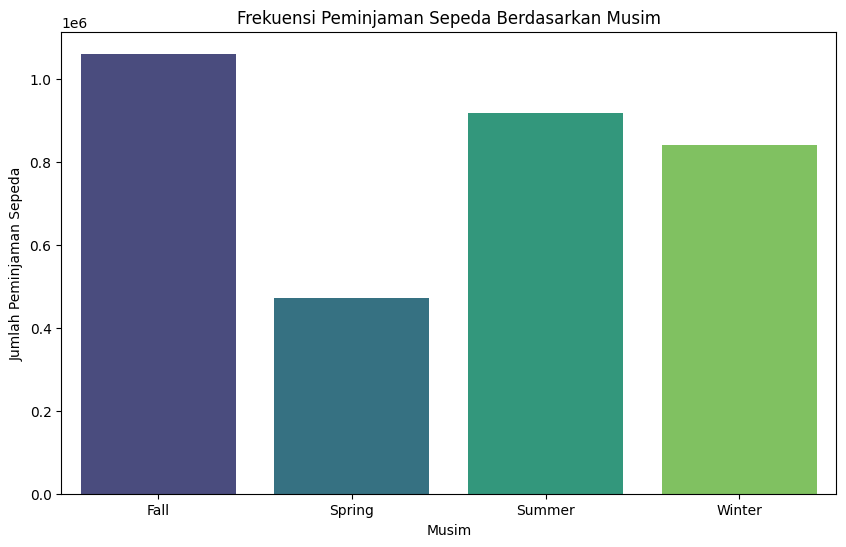

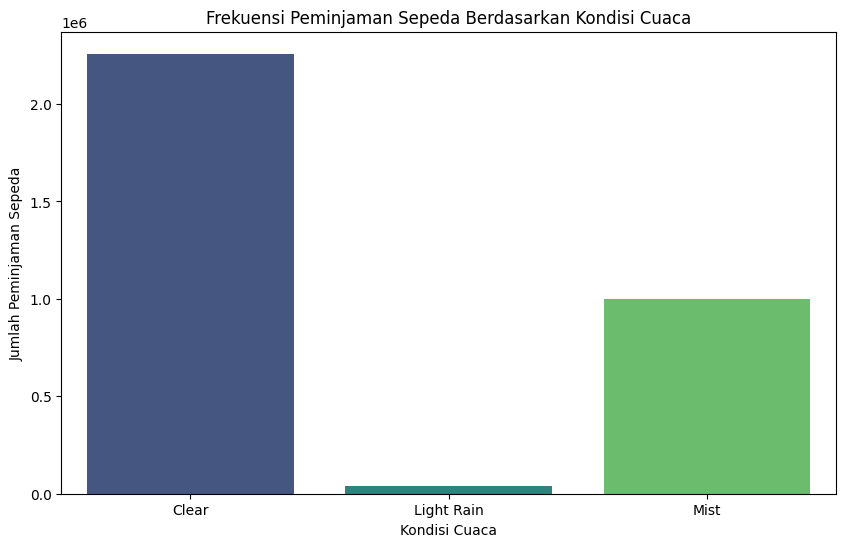

In [60]:
# Analisis Pertanyaan 1

# Mengelompokkan data dan menghitung jumlah cnt pada setiap musim
season_count = merged_df.groupby(by="season")["cnt"].sum().reset_index()

# Membuat bar plot musim
plt.figure(figsize=(10, 6))
sns.barplot(data=season_count, x="season", y="cnt", palette="viridis")
plt.title("Frekuensi Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

# Mengelompokkan data dan menghitung jumlah cnt pada setiap kondisi cuaca
weather_count = merged_df.groupby(by="weathersit")["cnt"].sum().reset_index()

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_count, x="weathersit", y="cnt", palette="viridis")
plt.title("Frekuensi Peminjaman Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

### Pertanyaan 2:

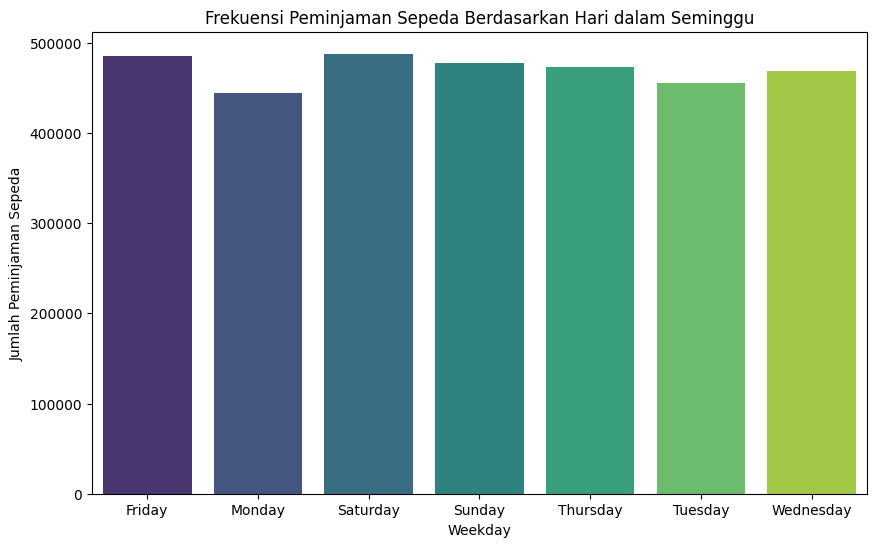

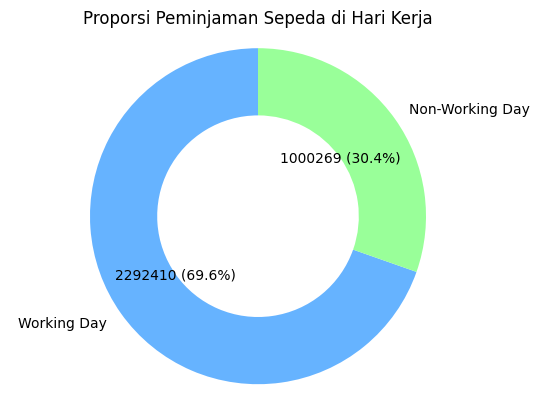

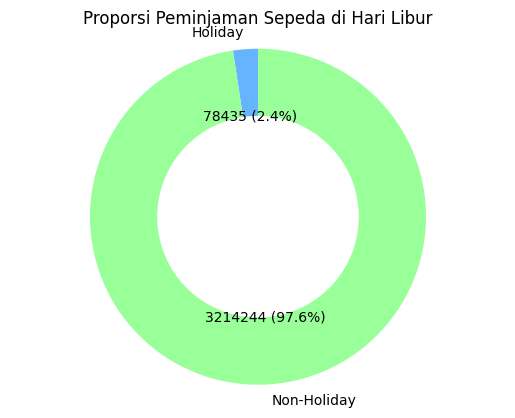

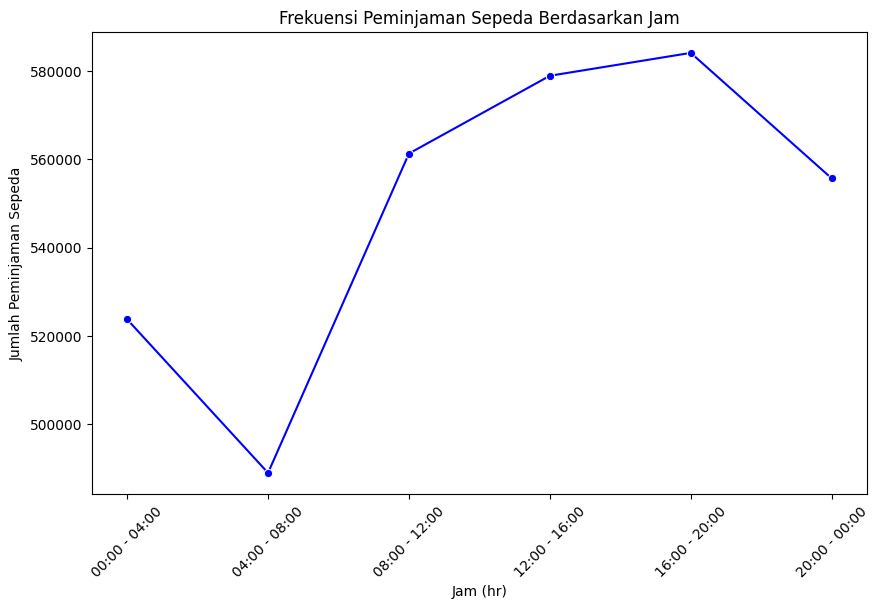

<Figure size 640x480 with 0 Axes>

In [61]:
# Analisis Pertanyaan 2

# Mengelompokkan data dan menghitung jumlah cnt pada hari dalam seminggu
season_count = merged_df.groupby(by="weekday")["cnt"].sum().reset_index()

# Membuat bar plot hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.barplot(data=season_count, x="weekday", y="cnt", palette="viridis")
plt.title("Frekuensi Peminjaman Sepeda Berdasarkan Hari dalam Seminggu")
plt.xlabel("Weekday")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

# Menghitung jumlah peminjaman sepeda pada hari kerja
workingday_counts = merged_df[merged_df['workingday'] == 'Yes']['cnt'].sum()
non_workingday_counts = merged_df[merged_df['workingday'] == 'No']['cnt'].sum()

# Menyiapkan data untuk pie chart
labels_workingday = ['Working Day', 'Non-Working Day']
sizes_workingday = [workingday_counts, non_workingday_counts]
colors_workingday = ['#66b3ff', '#99ff99']

# Membuat pie chart untuk workingday
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes_workingday, labels=labels_workingday,
                                  autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(sizes_workingday) / 100, p),
                                  colors=colors_workingday, startangle=90, wedgeprops=dict(width=0.4))
ax.axis('equal')  # Mengatur pie chart menjadi lingkaran

# Menambahkan judul
plt.title('Proporsi Peminjaman Sepeda di Hari Kerja')

# Menampilkan pie chart
plt.show()

# Menghitung jumlah peminjaman sepeda pada hari libur
holiday_counts = merged_df[merged_df['holiday'] == 'Yes']['cnt'].sum()
non_holiday_counts = merged_df[merged_df['holiday'] == 'No']['cnt'].sum()

# Menyiapkan data untuk pie chart
labels_holiday = ['Holiday', 'Non-Holiday']
sizes_holiday = [holiday_counts, non_holiday_counts]
colors_holiday = ['#66b3ff', '#99ff99']

# Membuat pie chart untuk holiday
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes_holiday, labels=labels_holiday,
                                  autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(sizes_holiday) / 100, p),
                                  colors=colors_holiday, startangle=90, wedgeprops=dict(width=0.4))
ax.axis('equal')  # Mengatur pie chart menjadi lingkaran

# Menambahkan judul
plt.title('Proporsi Peminjaman Sepeda di Hari Libur')

# Menampilkan pie chart
plt.show()

# Mengelompokkan data dan menghitung jumlah cnt pada setiap jam
hr_count = merged_df.groupby(by="hr")["cnt"].sum().reset_index()

# Membuat line plot untuk rentang jam
plt.figure(figsize=(10, 6))
sns.lineplot(data=hr_count, x="hr", y="cnt", marker="o", color="blue")
plt.title("Frekuensi Peminjaman Sepeda Berdasarkan Jam")
plt.xlabel("Jam (hr)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(rotation=45)
plt.show()

plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1

 Berdasarkan analisis jumlah peminjaman sepeda berdasarkan musim, diperoleh hasil sebagai berikut:
   1.   Peminjaman sepeda tertinggi terjadi pada musim Fall (Gugur) dengan total sebanyak 1,061,129 peminjaman.
   2. Musim Summer (Panas) menjadi musim dengan peminjaman sepeda tertinggi kedua, mencapai 918,589 peminjaman.
   3. Musim Winter (Dingin) memiliki jumlah peminjaman sepeda berada di peringkat ketiga, dengan total 841,613 peminjaman.
   4. Musim Spring (Semi) menunjukkan jumlah peminjaman sepeda yang lebih rendah, mencapai 471,348 peminjaman.

 Dalam konteks cuaca, hasil analisis peminjaman sepeda berdasarkan jenis cuaca adalah sebagai berikut:
   1. Cuaca Clear (Cerah) menjadi kondisi cuaca yang paling mendukung untuk peminjaman sepeda, dengan jumlah peminjaman mencapai 2,257,952.
   2. Cuaca Mist (Kabut) menduduki peringkat kedua dengan total 996,858 peminjaman sepeda.
   3. Cuaca Light Snow/Rain (Hujan/Salju Ringan) memiliki jumlah peminjaman sepeda yang lebih rendah, yaitu 37,869.

 Kesimpulan tersebut dapat memberikan pandangan bahwa musim dan cuaca memiliki pengaruh terhadap pola peminjaman sepeda. Musim Gugur dan kondisi cuaca yang cerah cenderung menjadi preferensi pengguna sepeda untuk melakukan peminjaman. Sebaliknya, kondisi cuaca yang kurang mendukung, seperti kabut atau hujan/salju ringan, dapat mempengaruhi jumlah peminjaman sepeda menjadi sedikit.


- Conclution pertanyaan 2

 Berdasarkan analisis jumlah peminjaman sepeda berdasarkan hari dalam seminggu, diperoleh hasil sebagai berikut:

  1. Hari Saturday (Sabtu) menunjukkan peminjaman sepeda tertinggi dengan total 487,790 peminjaman.
  2. Urutan hari-hari dengan peminjaman sepeda tertinggi selanjutnya adalah Friday (Jumat) dengan 485,395 peminjaman dan Sunday (Minggu) dengan 477,807 peminjaman.
  3. Hari-hari lainnya memiliki jumlah peminjaman sepeda yang cenderung serupa, tetapi dengan perbedaan yang cukup signifikan.

 Berdasarkan analisis jumlah peminjaman sepeda berdasarkan hari kerja dan hari libur, diperoleh hasil sebagai berikut:

  1. Peminjaman sepeda pada hari kerja (workingday) mencapai total 2,292,410 peminjaman, menunjukkan bahwa penggunaan sepeda lebih tinggi pada hari-hari kerja.
  2. Jumlah peminjaman sepeda pada hari libur (holiday) adalah 78,435, yang lebih rendah dibandingkan dengan hari kerja.

 Berdasarkan analisis jumlah peminjaman sepeda berdasarkan rentang jam, diperoleh hasil sebagai berikut:

  1. Rentang jam 16:00 - 20:00 merupakan periode dengan peminjaman sepeda tertinggi, mencapai 584,126 peminjaman.
  2. Rentang jam lainnya mengikuti dengan jumlah peminjaman yang cenderung serupa, namun tetap menunjukkan variasi.
  
  Kesimpulan ini memberikan gambaran bahwa faktor hari dalam seminggu, keberadaan hari libur, dan rentang jam memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda. Hari-hari akhir pekan, terutama Sabtu, menjadi pilihan favorit pengguna sepeda, sedangkan hari kerja dan rentang jam sore hingga malam juga mencatat peminjaman yang tinggi.

### Blok Kode untuk Menjalankan Streamlit

In [63]:
!wget -q -O - ipv4.icanhazip.com

34.74.232.165


In [ ]:
! streamlit run bike_rental_dashboard.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.232.165:8501

npx: installed 22 in 4.996s
your url is: https://upset-areas-wonder.loca.lt
2023-12-24 20:44:00.769 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 534, in _run_script
    exec(code, module.__dict__)
  File "/gdrive/MyDrive/Kaggle/bike_rental_dashboard.py", line 13, in <module>
    fig, ax = plt.subplots()
NameError: name 'plt' is not defined
2023-12-24 20:44:14.257 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 534, in _run_script
    exec(code, module.__dict__)
  File "/gdrive/MyDrive/Kaggle/bike_rental_dashboard.py", line 19, in <module>
    fig, ax = plt.subplots()
NameError: name 'plt' is not defined
2023-12-24 20:44:15